# 2.4 DataFrame Exploration

When working with geoscientific data in machine learning, the quality and structure of your data are key factors in building reliable models. An initial preparation for AI-ready data is to perform initial explortion of the data set. In this lecture, we will walk through a typical data preparation pipeline using a pandas DataFrame, focusing on cleaning and transforming the data to be ready for modeling. The example will highlight reading data, checking correlations, handling missing values (NaNs), and removing zeros where appropriate.

## Read and Explore the data

We will download a Kaggle data set:

https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey




https://www.kaggle.com/code/alanabd/skyserver-sql2-27-2018-ile-ml-ve-cv/input

In [18]:
import pandas as pd

!wget "https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018 6_51_39 PM.csv"

--2024-10-07 10:06:41--  https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018%206_51_39%20PM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1377602 (1.3M) [text/plain]
Saving to: ‘Skyserver_SQL2_27_2018 6_51_39 PM.csv’

Skyserver_SQL2_27_2 100%[===================>]   1.31M  --.-KB/s    in 0.1s    

2024-10-07 10:06:41 (11.3 MB/s) - ‘Skyserver_SQL2_27_2018 6_51_39 PM.csv’ saved [1377602/1377602]



In [19]:
# df = pd.read_csv(r"path\to\file.csv") # Windows
df = pd.read_csv(r"Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [20]:
# Get the first few rows of the dataset
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [21]:
# what datatypes are in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


It looks like attribute ``class`` is a string of characters, others are numerical values.

In [22]:
# Summary statistics
df.describe()


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


##  Handling Missing Values (NaNs) & Zeros

Geoscience datasets often contain missing values (e.g., due to sensor malfunctions or data collection gaps) and zeros (which may or may not be meaningful depending on the context). You'll need to treat these cases carefully.


Missing data is common in geoscientific applications. In a pandas DataFrame, missing values are typically represented as NaNs. You can handle NaNs in several ways depending on the context:

* **Remove rows/columns with NaNs**: If the missing data is minimal or irrelevant, you can drop it.

* **Impute missing values**: For geoscience data, you might fill NaNs with interpolated values, means, or more sophisticated imputation techniques.

* **Zeros**: Zeros can sometimes be valid measurements, like in precipitation data (no rainfall). However, zeros might also indicate missing or incorrect data in some cases. It’s important to distinguish between meaningful zeros and errors.

In [23]:
# Check for missing values (NaNs)
print(df.isnull().sum())


objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [24]:

# Check for zeros
print((df == 0).sum())


objid         0
ra            0
dec           0
u             0
g             0
r             0
i             0
z             0
run           0
rerun         0
camcol        0
field         0
specobjid     0
class         0
redshift     19
plate         0
mjd           0
fiberid       0
dtype: int64


In [25]:
# Option 1: Remove rows with NaNs
df_cleaned = df.dropna()

In [26]:
df.replace([0, float('inf'), -float('inf')], pd.NA, inplace=True)
df_cleaned.replace([0, float('inf'), -float('inf')], pd.NA, inplace=True)

## Final Data Check
After cleaning the data, it’s crucial to perform a final check before feeding it into a machine learning model.

In [31]:
# Final check for NaNs and zeros
print(df_cleaned.isnull().sum())

objid         0
ra            0
dec           0
u             0
g             0
r             0
i             0
z             0
run           0
rerun         0
camcol        0
field         0
specobjid     0
class         0
redshift     19
plate         0
mjd           0
fiberid       0
dtype: int64


In [33]:
# Find rows where redshift is zero
redshift_zeros = df_cleaned[df_cleaned['redshift'].isnull()]
print(redshift_zeros)

             objid          ra        dec         u         g         r  \
413   1.237650e+18  153.398300  -0.175485  19.52077  17.50807  16.52395   
1427  1.237650e+18  228.547774   0.539264  18.36191  17.01026  16.28012   
1747  1.237650e+18  160.613763  -0.169214  18.62606  17.14186  16.55617   
1748  1.237650e+18  160.619206  -0.117873  17.91615  16.14398  15.44278   
1749  1.237650e+18  160.633146  -0.010845  19.01287  17.56112  17.00329   
1868  1.237650e+18  220.731839  -0.721282  19.33014  18.34351  18.12662   
3077  1.237650e+18  172.693652  -0.625297  19.38104  18.31248  17.73633   
4325  1.237650e+18  199.431687   0.176529  19.59316  17.73319  16.84315   
4545  1.237650e+18  140.699557   0.617955  19.19350  16.85946  15.96408   
4757  1.237650e+18  180.886273  -3.436909  19.57545  18.04842  17.45899   
6359  1.237650e+18  199.254590  66.341243  17.76033  16.26974  15.73430   
6360  1.237650e+18  199.367375  66.274861  18.95181  17.92678  17.59843   
7093  1.237650e+18  172.5

In [36]:
df_cleaned['redshift'].replace('<NA>', pd.NA, inplace=True)
df_cleaned.dropna(subset=['redshift'], inplace=True)

In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9981 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      9981 non-null   float64
 1   ra         9981 non-null   float64
 2   dec        9981 non-null   float64
 3   u          9981 non-null   float64
 4   g          9981 non-null   float64
 5   r          9981 non-null   float64
 6   i          9981 non-null   float64
 7   z          9981 non-null   float64
 8   run        9981 non-null   int64  
 9   rerun      9981 non-null   int64  
 10  camcol     9981 non-null   int64  
 11  field      9981 non-null   int64  
 12  specobjid  9981 non-null   float64
 13  class      9981 non-null   object 
 14  redshift   9981 non-null   object 
 15  plate      9981 non-null   int64  
 16  mjd        9981 non-null   int64  
 17  fiberid    9981 non-null   int64  
dtypes: float64(9), int64(7), object(2)
memory usage: 1.4+ MB


In [38]:
df_cleaned.to_csv('cleaned_data.csv', index=False)
df_cleaned.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,plate,mjd,fiberid
count,9.981000e+03,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.0,9981.000000,9981.000000,9.981000e+03,9981.000000,9981.000000,9981.000000
mean,1.237650e+18,175.517213,14.844845,18.619527,17.372414,16.841475,16.583973,16.423153,981.181545,301.0,3.649835,302.355876,1.643135e+18,1459.311191,52941.578800,353.134956
std,0.000000e+00,47.817346,25.213167,0.828204,0.945234,1.067648,1.141790,1.203094,273.314213,0.0,1.666876,162.661046,2.013847e+18,1788.643981,1510.820579,206.198503
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.348280,-0.541062,18.178060,16.815140,16.173370,15.853950,15.619920,752.000000,301.0,2.000000,184.000000,3.389220e+17,301.000000,51900.000000,187.000000
50%,1.237650e+18,180.393638,0.405891,18.852980,17.495150,16.859240,16.555270,16.389960,756.000000,301.0,4.000000,299.000000,4.966550e+17,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.561819,35.852405,19.259070,18.010370,17.512870,17.258610,17.142010,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,8410.000000,57481.000000,1000.000000


## 2. Correlation Analysis
In machine learning, understanding the relationships between features can provide valuable insights. For example, in geosciences, soil moisture might be correlated with precipitation or vegetation indices. You can use a correlation matrix to check for such relationships.

First, our data frame contains ``object`` that are non numerical values (characters), so to perform the correlation analysis on numerical data, we first have to only look at numerical value. Create a new data frame that only retains numerical values.

In [39]:
# Create a new data frame that only retains numerical values
df_numerical = df_cleaned.select_dtypes(exclude=['object'])
df_numerical.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,3306,54922,512


In [40]:
# Calculate correlation matrix
corr_matrix = df_numerical.corr()


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


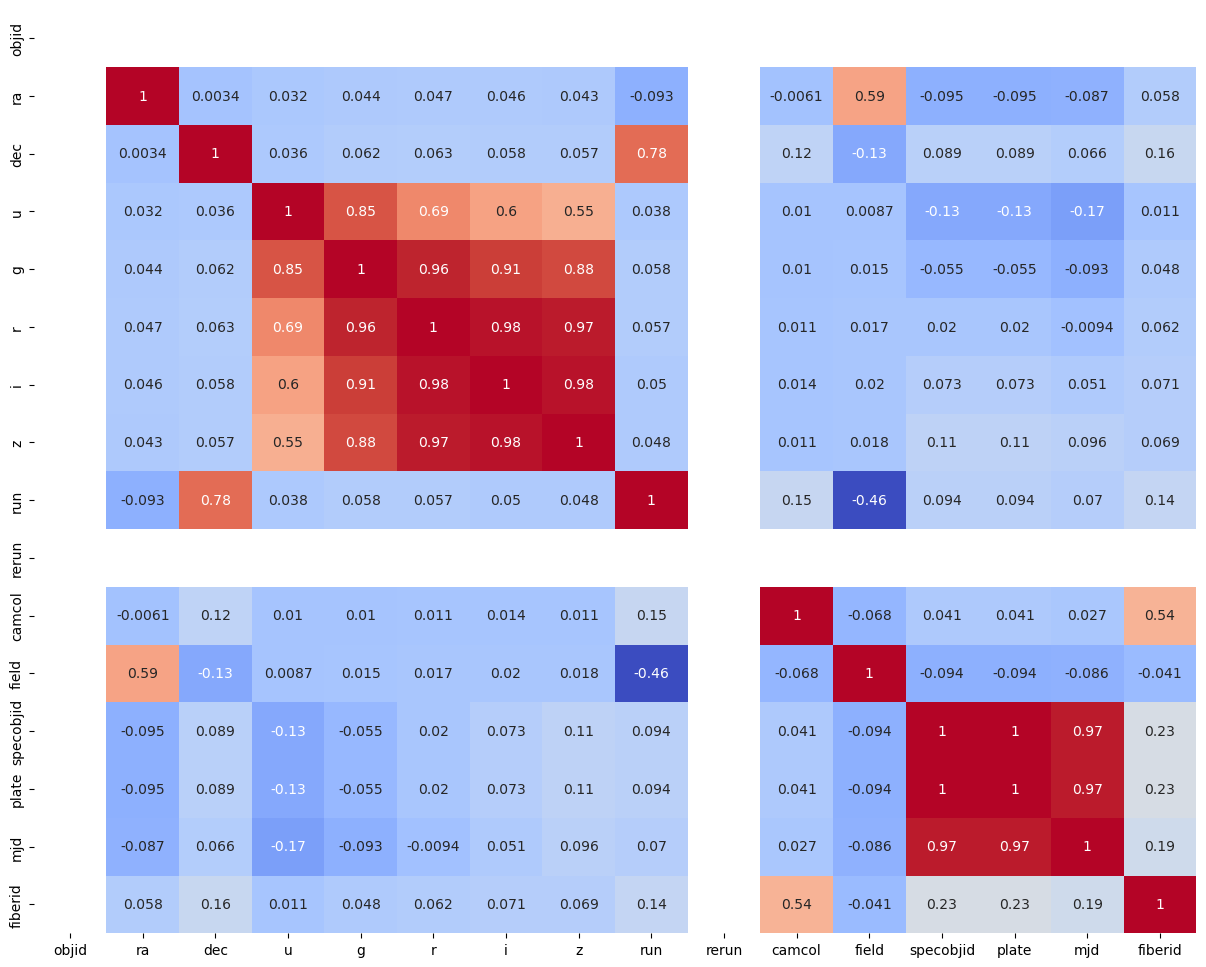

In [42]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',cbar=False)
plt.show()


Look for high correlations, which can indicate redundancy among features. In cases where variables are highly correlated, you may decide to drop one to avoid multicollinearity.

The **Spearman rank** correlation coefficient is a non-parametric measure of rank correlation that assesses the strength and direction of the monotonic relationship between two variables. It is particularly useful in geoscientific data analysis for several reasons:

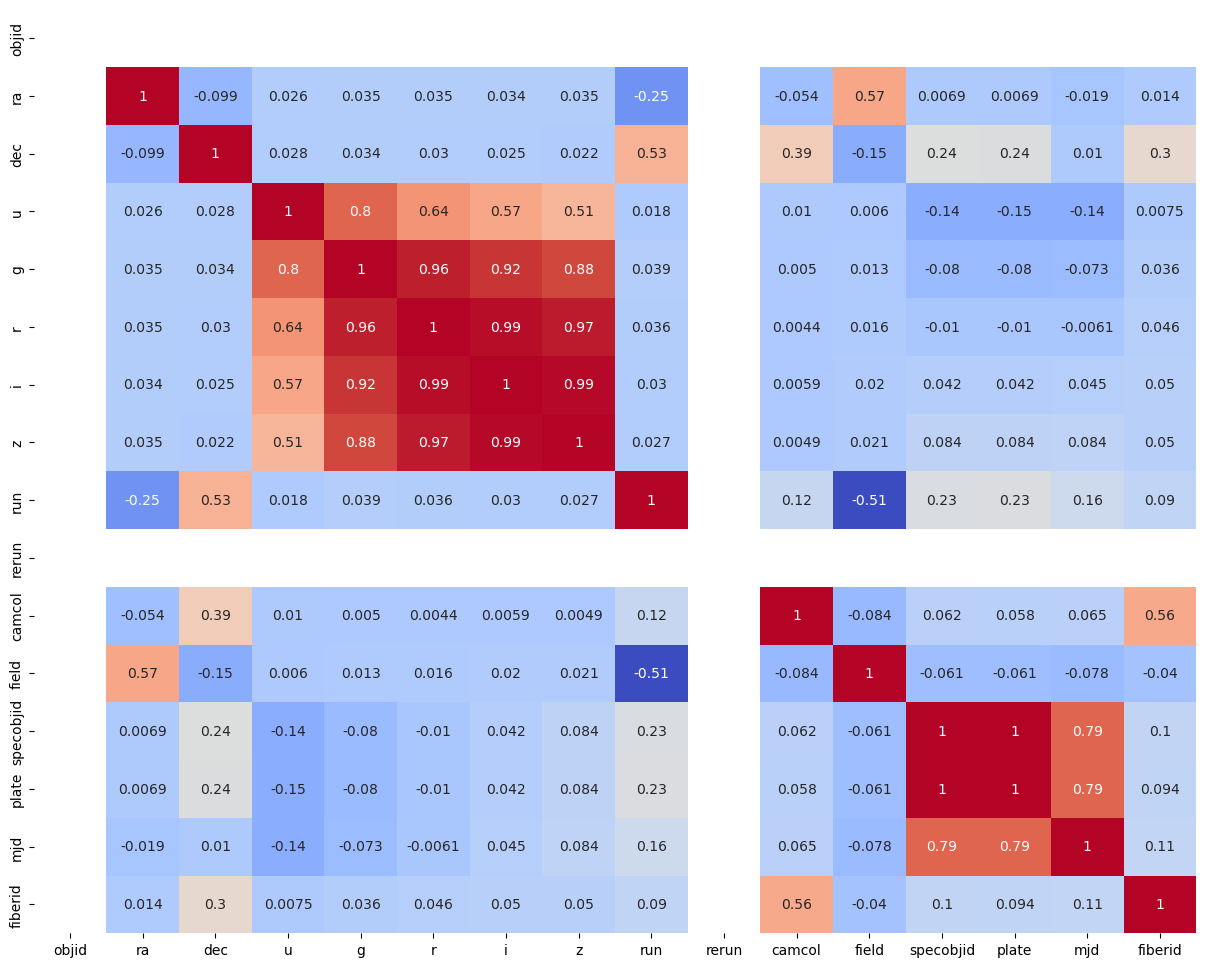

In [43]:
# Calculate Spearman correlation matrix
spearman_corr_matrix = df_numerical.corr(method='spearman')

# Plot the Spearman correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.show()

## Feature distribution

We can now explore how interesting data (features) are distributed for the three classes.

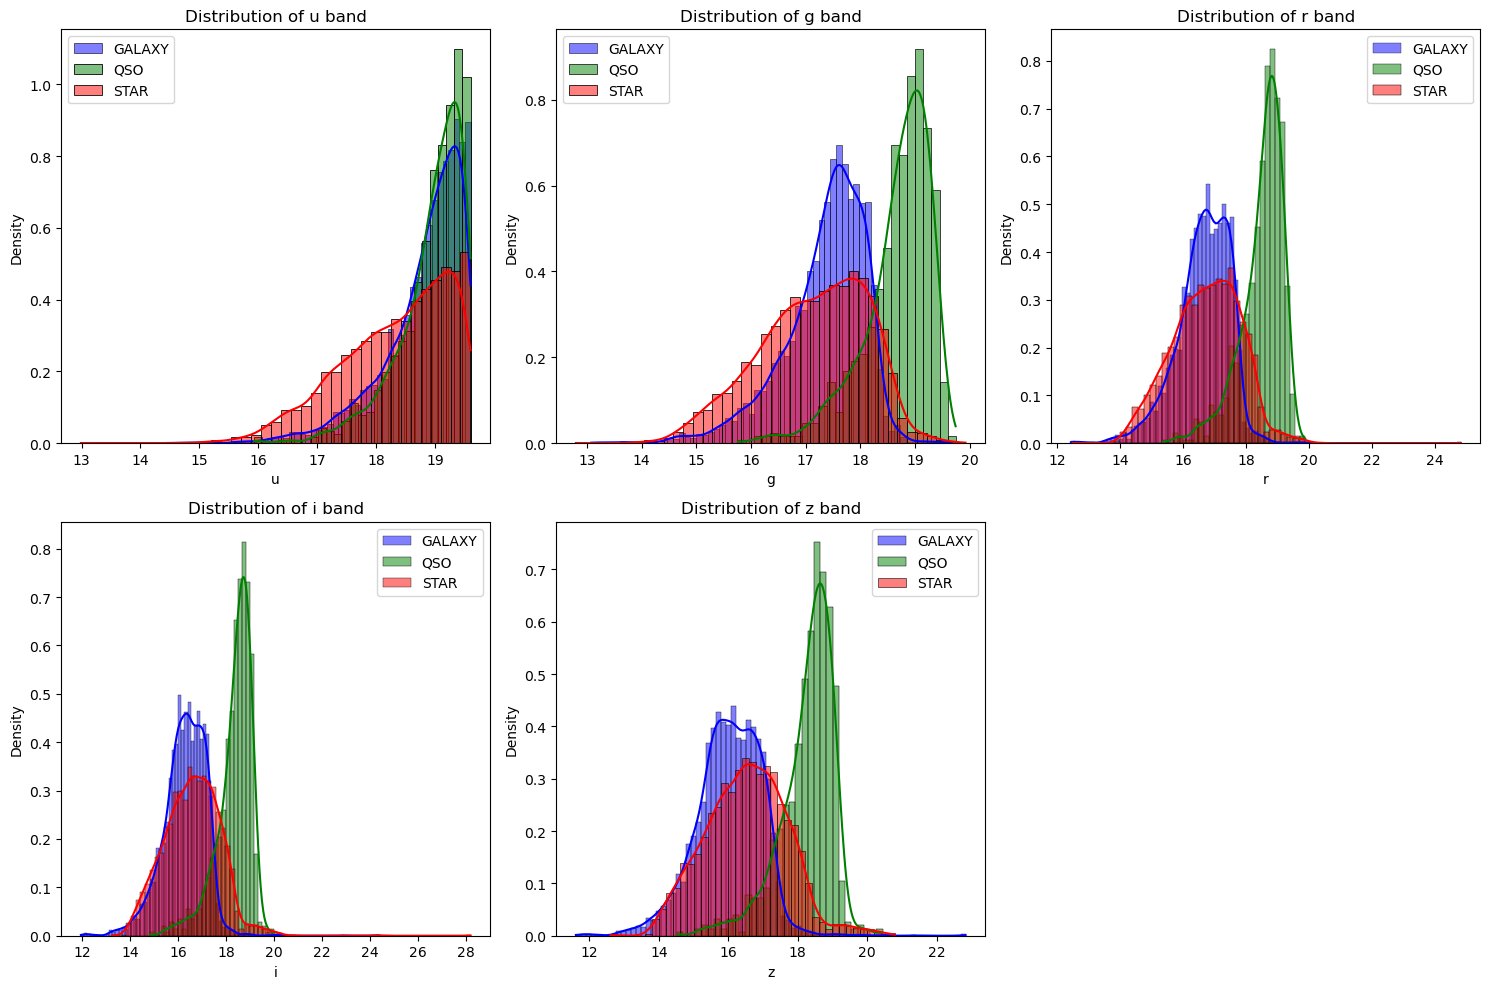

In [44]:
# Filter the data for each class
galaxy = df_cleaned[df_cleaned['class'] == 'GALAXY']
qso = df_cleaned[df_cleaned['class'] == 'QSO']
star = df_cleaned[df_cleaned['class'] == 'STAR']

# Plot histograms for each band and class
bands = ['u', 'g', 'r', 'i', 'z']
plt.figure(figsize=(15, 10))

for i, band in enumerate(bands):
    plt.subplot(2, 3, i+1)
    sns.histplot(galaxy[band], kde=True, color='blue', label='GALAXY', stat='density')
    sns.histplot(qso[band], kde=True, color='green', label='QSO', stat='density')
    sns.histplot(star[band], kde=True, color='red', label='STAR', stat='density')
    plt.title(f'Distribution of {band} band')
    plt.legend()

plt.tight_layout()
plt.show()

Are there features that could allow us to discriminate between the objects?

Some distrubutions look normal, some look skewed, how to characterize and quantify data distributions?

In [46]:
from scipy.stats import skew, kurtosis

# Function to calculate summary statistics
def summarize_distribution(df, features):
    summary = {}
    for feature in features:
        summary[feature] = {
            'mean': df[feature].mean(),
            'median': df[feature].median(),
            'std': df[feature].std(),
            'skewness': skew(df[feature]),
            'kurtosis': kurtosis(df[feature])
        }
    return pd.DataFrame(summary)

# Features to summarize
features = ['u', 'g', 'r', 'i', 'z']

# Summarize distributions for each class
summary_galaxy = summarize_distribution(galaxy, features)
summary_qso = summarize_distribution(qso, features)
summary_star = summarize_distribution(star, features)

# Display the summaries
print("Galaxy Summary:")
print(summary_galaxy)
print("\nQSO Summary:")
print(summary_qso)
print("\nStar Summary:")
print(summary_star)

Galaxy Summary:
                  u          g          r          i          z
mean      18.805389  17.351101  16.649801  16.272373  16.017019
median    18.989040  17.496600  16.741430  16.349380  16.072650
std        0.690544   0.755898   0.847409   0.884605   0.945635
skewness  -1.538958  -1.179191  -0.597441  -0.391759  -0.255175
kurtosis   3.041600   2.232646   3.012774   3.178772   2.210926

QSO Summary:
                  u          g          r          i          z
mean      18.942928  18.678714  18.498535  18.360007  18.274761
median    19.088800  18.822220  18.659365  18.529880  18.457200
std        0.569208   0.614986   0.673280   0.719977   0.774447
skewness  -1.571252  -1.369437  -1.335168  -1.437923  -1.281325
kurtosis   3.173233   2.242735   2.176494   2.705256   2.471614

Star Summary:
                  u          g          r          i          z
mean      18.330439  17.130547  16.732093  16.594047  16.531119
median    18.500935  17.237445  16.788435  16.621145  16.54

## 4. Exercise 